In [1]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from g_ml.utilidades.processamento import escala_padrao

from sklearn.metrics import davies_bouldin_score

np.random.seed(42)

In [2]:
penguins = np.genfromtxt('../data/penguins.csv', delimiter=',')

In [3]:
X = penguins[:, 0:4]
y = penguins[:, -1]

In [4]:
escalador_X = escala_padrao()

escalador_X.fit(X)

X_escalado = escalador_X.transform(X)

## PCA

In [5]:
class PCA():
    def __init__(self):
        self.cov = None
        self.valores = None
        self.vetores = None
        self.var_explicada = None
    
    def fit(self, X):
        self.cov = np.cov(X.T)
        self.valores, self.vetores = np.linalg.eig(self.cov)
        self.var_explicada = self.valores/np.sum(self.valores)
    
    def transform(self, X, m):
        self.P = self.vetores[0:m]
        self.u = np.mean(X, axis=0)
        self.z = (X - self.u) @ self.P.T
        return self.z
    
    def reconstruir(self):
        return self.z @ self.P + self.u

In [6]:
pca = PCA()

In [7]:
pca.fit(X_escalado)

In [8]:
z = pca.transform(X_escalado, 2)

**Projeção em duas dimensões dos padrões obtidas pelo método PCA**

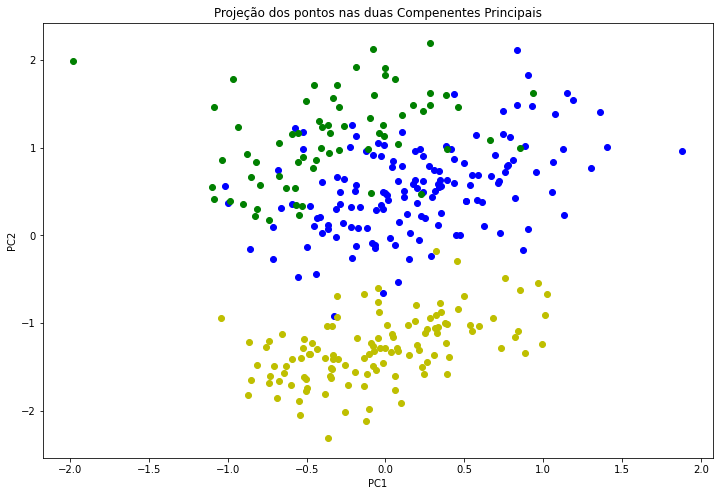

In [9]:
classes = np.unique(y)
plt.figure(figsize=(12,8))
plt.scatter(z[:,0][y==classes[0]],z[:,1][y==classes[0]], c= 'b')
plt.scatter(z[:,0][y==classes[1]],z[:,1][y==classes[1]], c= 'g')
plt.scatter(z[:,0][y==classes[2]],z[:,1][y==classes[2]], c= 'y')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projeção dos pontos nas duas Compenentes Principais")
plt.show()

**Variância explicada por número de dimensões**

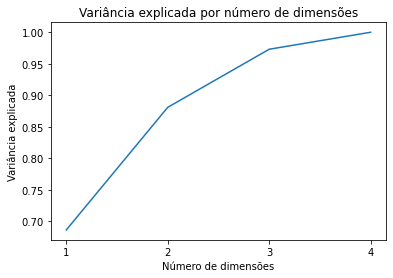

In [10]:
var_acumulada = pca.var_explicada.cumsum()
ticks = list(range(1,5))
plt.plot(ticks,var_acumulada)
plt.ylabel("Variância explicada")
plt.xlabel("Número de dimensões")
plt.title("Variância explicada por número de dimensões")
plt.xticks(ticks=ticks)
plt.show()